# Gradient boosted deTrees

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

## Data segmenation for training

In [4]:
df = pd.read_csv('PreparedData.csv', sep=';', index_col=0)

In [14]:
x = df.drop(['New_Credit_Card_Flag'], axis=1)
y = df['New_Credit_Card_Flag']

In [15]:
ros = RandomOverSampler(sampling_strategy = 0.5)

x_res, y_res = ros.fit_resample(x, y)

y_res.value_counts()

0    98933
1    49466
Name: New_Credit_Card_Flag, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=101)

In [19]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [24]:
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001)

rs.fit(train_scaled, y_train)

y_pred = rs.best_estimator_.predict(test_scaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", l

[18:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
accuracy_score(y_test, y_pred)

0.9424865229110512

C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


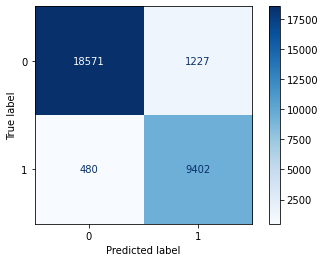

In [28]:
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [29]:
rs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1,
 'learning_rate': 0.3583883653988028,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 354,
 'subsample': 0.8}

In [30]:
rs.best_score_

0.9372215028932345

In [31]:
importance = rs.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01488
Feature: 1, Score: 0.01606
Feature: 2, Score: 0.01574
Feature: 3, Score: 0.02959
Feature: 4, Score: 0.02465
Feature: 5, Score: 0.02177
Feature: 6, Score: 0.01808
Feature: 7, Score: 0.01958
Feature: 8, Score: 0.01443
Feature: 9, Score: 0.01298
Feature: 10, Score: 0.02153
Feature: 11, Score: 0.01630
Feature: 12, Score: 0.04007
Feature: 13, Score: 0.05123
Feature: 14, Score: 0.05645
Feature: 15, Score: 0.04305
Feature: 16, Score: 0.26681
Feature: 17, Score: 0.01541
Feature: 18, Score: 0.01538
Feature: 19, Score: 0.06841
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01302
Feature: 22, Score: 0.01450
Feature: 23, Score: 0.01616
Feature: 24, Score: 0.01685
Feature: 25, Score: 0.03381
Feature: 26, Score: 0.02938
Feature: 27, Score: 0.01821
Feature: 28, Score: 0.01724
Feature: 29, Score: 0.01621
Feature: 30, Score: 0.01448
Feature: 31, Score: 0.02775


<AxesSubplot:>

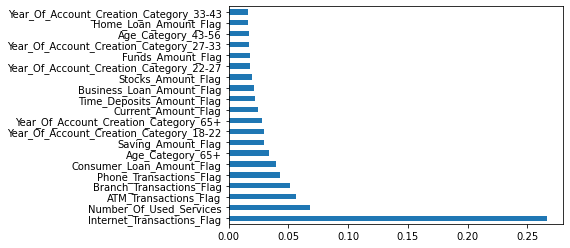

In [32]:
(pd.Series(rs.best_estimator_.feature_importances_, index=x.columns)
   .nlargest(20)
   .plot(kind='barh'))

# Choosing best parameters

In [34]:
df = df[['Internet_Transactions_Flag','Number_Of_Used_Services','ATM_Transactions_Flag',
'Branch_Transactions_Flag','Phone_Transactions_Flag','Consumer_Loan_Amount_Flag','New_Credit_Card_Flag']]

In [35]:
x = df.drop(['New_Credit_Card_Flag'], axis=1)
y = df['New_Credit_Card_Flag']

In [36]:
ros = RandomOverSampler(sampling_strategy = 0.5)

x_res, y_res = ros.fit_resample(x, y)

y_res.value_counts()

0    98933
1    49466
Name: New_Credit_Card_Flag, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=101)

In [38]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [39]:
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001)

rs.fit(train_scaled, y_train)

y_pred = rs.best_estimator_.predict(test_scaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", l

[18:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
accuracy_score(y_test, y_pred)

0.8111185983827494

C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


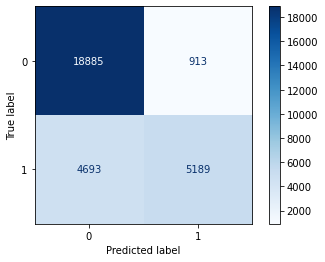

In [41]:
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [42]:
rs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1,
 'learning_rate': 0.3583883653988028,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 354,
 'subsample': 0.8}

In [43]:
rs.best_score_

0.810417876532882

<AxesSubplot:>

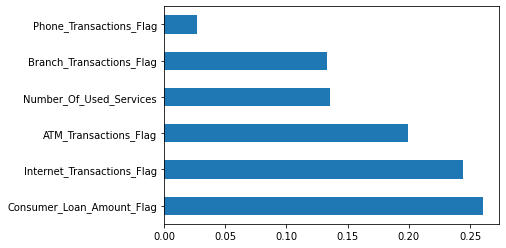

In [45]:
(pd.Series(rs.best_estimator_.feature_importances_, index=x.columns)
   .nlargest(20)
   .plot(kind='barh'))